In [1]:
import pandas as pd
import numpy as np

In [88]:
#data = pd.read_csv("../../merged_dataset_ellie.csv")
data = pd.read_csv("../../data/combined_jun13_train.csv", encoding = "ISO-8859-1")

In [75]:
pd.set_option('max_columns', None)

In [76]:
data.sample(10)

,Unnamed: 0,Unnamed: 0.1,ID,YEAR_FIPS,YEAR,STATE_FIPS,COUNTY_FIPS,STATE,COUNTY,FIPS,REP_CANDIDATE,DEM_CANDIDATE,REP_VOTES,DEM_VOTES,COUNTY_TOTALVOTES,WINNING_CANDIDATE,WINNING_PARTY,WINNING_PARTY_BINARY,HOUSE_WINNING_BINARY,SENATE_WINNING_BINARY,UNEMPLOYMENT_RATE,AVG_WAGE_SALARY,AA_FEMALE,AA_MALE,BA_FEMALE,BA_MALE,H_FEMALE,H_MALE,IA_FEMALE,IA_MALE,NA_FEMALE,NA_MALE,TOT_FEMALE,TOT_MALE,TOT_POP,WA_FEMALE,WA_MALE,TOT_POP_LESS19,TOT_MALE_LESS19,TOT_FEMALE_LESS19,TOT_POP_20to39,TOT_MALE_20to39,TOT_FEMALE_20to39,TOT_POP_40to59,TOT_MALE_40to59,TOT_FEMALE_40to59,TOT_POP_Above60,TOT_MALE_Above60,TOT_FEMALE_Above60,AA_FEMALE%,AA_MALE%,BA_FEMALE%,BA_MALE%,H_FEMALE%,H_MALE%,IA_FEMALE%,IA_MALE%,NA_FEMALE%,NA_MALE%,WA_FEMALE%,WA_MALE%,TOT_FEMALE%,TOT_MALE%,TOT_POP_LESS19%,TOT_POP_20to39%,TOT_POP_40to59%,TOT_POP_Above60%,TRAIN
11217,11217,11217,14560,200440145,2004,40,145,Oklahoma,Wagoner County,40145.0,George W. Bush,John Kerry,19081.0,9157.0,28238.0,George W. Bush,republican,1,1.0,1.0,4.7,25471.0,253,207,1235,1166,896,980,2975,3008,4.0,8,31139,30561,61700,24906,24472,18326,9377,8949,15048,7458,7590,18170,8930,9240,10156,4796,5360,0.004100,0.003355,0.020016,0.018898,0.014522,0.015883,0.048217,0.048752,0.000065,0.000130,0.403663,0.396629,0.504684,0.495316,0.297018,0.243890,0.294489,0.164603,0
2666,2666,2666,3035,201246085,2012,46,85,South Dakota,Lyman County,46085.0,Mitt Romney,Barack Obama,933.0,605.0,1569.0,Mitt Romney,republican,1,1.0,NaN,5.9,26646.0,6,4,3,0,22,20,695,737,0.0,2,1794,1967,3761,1046,1167,1191,660,531,834,452,382,986,510,476,750,345,405,0.001595,0.001064,0.000798,0.000000,0.005850,0.005318,0.184791,0.195959,0.000000,0.000532,0.278118,0.310290,0.477001,0.522999,0.316671,0.221750,0.262164,0.199415,0
1032,1032,1032,1401,201218145,2012,18,145,Indiana,Shelby County,18145.0,Mitt Romney,Barack Obama,10978.0,5359.0,16760.0,Mitt Romney,republican,1,1.0,0.0,8.4,0.0,146,115,211,271,751,885,56,58,21.0,25,22348,21967,44315,21696,21286,11849,6120,5729,10296,5220,5076,13415,6707,6708,8755,3920,4835,0.003295,0.002595,0.004761,0.006115,0.016947,0.019971,0.001264,0.001309,0.000474,0.000564,0.489586,0.480334,0.504299,0.495701,0.267381,0.232337,0.302719,0.197563,0
94,94,94,120,20125019,2012,5,19,Arkansas,Clark County,5019.0,Mitt Romney,Barack Obama,4343.0,3811.0,8409.0,Mitt Romney,republican,1,1.0,NaN,9.9,371412.0,69,70,2996,2433,465,454,67,64,4.0,1,12002,10925,22927,8695,8226,6125,2982,3143,6832,3381,3451,5361,2556,2805,4609,2006,2603,0.003010,0.003053,0.130676,0.106119,0.020282,0.019802,0.002922,0.002791,0.000174,0.000044,0.379247,0.358791,0.523488,0.476512,0.267152,0.297989,0.233829,0.201029,0
12685,12685,12685,16075,200817035,2008,17,35,Illinois,Cumberland County,17035.0,John McCain,Barack Obama,3156.0,2055.0,5321.0,John McCain,republican,1,0.0,0.0,7.1,232264.0,14,12,22,18,45,31,9,8,0.0,1,5592,5485,11077,5503,5407,2946,1487,1459,2563,1332,1231,3121,1576,1545,2447,1090,1357,0.001264,0.001083,0.001986,0.001625,0.004062,0.002799,0.000812,0.000722,0.000000,0.000090,0.496795,0.488129,0.504830,0.495170,0.265956,0.231380,0.281755,0.220908,0
11055,11055,11055,14398,200439013,2004,39,13,Ohio,Belmont County,39013.0,George W. Bush,John Kerry,15589.0,17574.0,33320.0,John Kerry,democrat,0,1.0,1.0,7.1,26105.0,125,105,672,2030,148,186,46,54,7.0,3,35433,34786,70219,34301,32301,16308,8484,7824,16910,9213,7697,20874,10492,10382,16127,6597,9530,0.001780,0.001495,0.009570,0.028910,0.002108,0.002649,0.000655,0.000769,0.000100,0.000043,0.488486,0.460004,0.504607,0.495393,0.232245,0.240818,0.297270,0.229667,0
2392,2392,2392,2761,201239173,2012,39,173,Ohio,Wood County,39173.0,Mitt Romney,Barack Obama,29704.0,32802.0,63948.0,Barack Obama,democrat,0,0.0,0.0,6.9,161452.0,1040,963,1630,1520,2889,2846,176,150,21.0,27,64374,61578,125952,60600,58013,33749,16990,16759,36437,18238,18199,33377,16345,17032,22389,10005,12384,0.008257,0.007646,0.012941,0.012068,0.022937,0.022596,0.001397,0.001191,0.000167,0.000214,0.481136,0.460596,0.511099,0.488901,0.267951,0.289293,0.264998,

In [5]:
## some cleanup..

data.isnull().sum()

Unnamed: 0          0
Unnamed: 0.1        0
ID                  0
YEAR_FIPS           0
YEAR                0
                   ..
TOT_POP_LESS19%     0
TOT_POP_20to39%     0
TOT_POP_40to59%     0
TOT_POP_Above60%    0
TRAIN               0
Length: 68, dtype: int64

In [35]:
np.all(np.isfinite(data))

False

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15437 entries, 0 to 15436
Data columns (total 68 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15437 non-null  int64  
 1   Unnamed: 0.1           15437 non-null  int64  
 2   ID                     15437 non-null  int64  
 3   YEAR_FIPS              15437 non-null  int64  
 4   YEAR                   15437 non-null  int64  
 5   STATE_FIPS             15437 non-null  int64  
 6   COUNTY_FIPS            15437 non-null  int64  
 7   STATE                  15437 non-null  object 
 8   COUNTY                 15437 non-null  object 
 9   FIPS                   15437 non-null  float64
 10  REP_CANDIDATE          15437 non-null  object 
 11  DEM_CANDIDATE          15437 non-null  object 
 12  REP_VOTES              15437 non-null  float64
 13  DEM_VOTES              15437 non-null  float64
 14  COUNTY_TOTALVOTES      15437 non-null  float64
 15  WI

# cleaning/wrangling...

In [8]:
# data['state'] = data['state'].astype('category').cat.codes
# data['state_po'] = data['state_po'].astype('category').cat.codes
# data['county'] = data['county'].astype('category').cat.codes
# data['winning party'] = data['winning party'].astype('category').cat.codes

In [9]:
# data.info()

In [89]:
data.drop(['WINNING_CANDIDATE', 'REP_CANDIDATE', 'DEM_CANDIDATE', 'WINNING_PARTY', 'COUNTY', 'STATE'], axis=1, inplace=True)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# X = data.drop("winning_party_binary", axis=1)
# y = data["winning_party_binary"]

In [9]:
filter_year =  data['YEAR'] == 2012
type(filter_year)

pandas.core.series.Series

In [77]:
#data.drop(data[data['TRAIN'] != 1])
#data.drop(data[data['TRAIN'] != 1])
# X = data.query('TRAIN != 1')
# X = X.reset_index(drop=True)

In [78]:
len(X)

14683

In [56]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [110]:
def train_test_split_by_year(X, year, train_filter=False, cols=None):
    
    X_copy = X
    
    filter_year =  X['YEAR'] == year
    not_filter_year =  X['YEAR'] != year

    X_test = X[filter_year]
    
    if (cols != None):
        X_test = X_test[cols]
    
    X_test = X_test.drop("WINNING_PARTY_BINARY", axis=1)
    print('X_test: {}'.format(X_test.shape))
    
    y_test = X[filter_year]
    y_test = y_test["WINNING_PARTY_BINARY"]
    print('y_test: {}'.format(y_test.shape))
    
    
    if (train_filter == True):
        X_copy = X_copy.query('TRAIN != 1')
        X_copy = X_copy.reset_index(drop=True)
            
    X_train = X_copy[not_filter_year]
    
    if (cols != None):
        X_train = X_train[cols]
   
    X_train = X_train.drop("WINNING_PARTY_BINARY", axis=1)

    y_train = X_copy[not_filter_year]
    y_train = y_train["WINNING_PARTY_BINARY"]
    
    print('X_train: {}'.format(X_train.shape))
    print('y_train: {}'.format(y_train.shape))

    return X_train, X_test, y_train, y_test

In [13]:
X_train, X_test, y_train, y_test = train_test_split_by_year(data, 2016)


X_test: (3114, 61)
y_test: (3114,)
X_train: (12323, 61)
y_train: (12323,)


In [100]:
X_train, X_test, y_train, y_test = train_test_split_by_year(data, 2016, True)

X_test: (3114, 61)
y_test: (3114,)
X_train: (11569, 61)
y_train: (11569,)


/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [151]:
X_train.loc[X_train['YEAR'] == 2016]

,Unnamed: 0,Unnamed: 0.1,ID,YEAR_FIPS,YEAR,STATE_FIPS,COUNTY_FIPS,FIPS,REP_VOTES,DEM_VOTES,COUNTY_TOTALVOTES,UNEMPLOYMENT_RATE,AVG_WAGE_SALARY,AA_FEMALE,AA_MALE,BA_FEMALE,BA_MALE,H_FEMALE,H_MALE,IA_FEMALE,IA_MALE,NA_FEMALE,NA_MALE,TOT_FEMALE,TOT_MALE,TOT_POP,WA_FEMALE,WA_MALE,TOT_POP_LESS19,TOT_MALE_LESS19,TOT_FEMALE_LESS19,TOT_POP_20to39,TOT_MALE_20to39,TOT_FEMALE_20to39,TOT_POP_40to59,TOT_MALE_40to59,TOT_FEMALE_40to59,TOT_POP_Above60,TOT_MALE_Above60,TOT_FEMALE_Above60,AA_FEMALE%,AA_MALE%,BA_FEMALE%,BA_MALE%,H_FEMALE%,H_MALE%,IA_FEMALE%,IA_MALE%,NA_FEMALE%,NA_MALE%,WA_FEMALE%,WA_MALE%,TOT_FEMALE%,TOT_MALE%,TOT_POP_LESS19%,TOT_POP_20to39%,TOT_POP_40to59%,TOT_POP_Above60%,TRAIN


In [154]:
X_train.loc[X_train['TRAIN'] == 1]

,Unnamed: 0,Unnamed: 0.1,ID,YEAR_FIPS,YEAR,STATE_FIPS,COUNTY_FIPS,FIPS,REP_VOTES,DEM_VOTES,COUNTY_TOTALVOTES,UNEMPLOYMENT_RATE,AVG_WAGE_SALARY,AA_FEMALE,AA_MALE,BA_FEMALE,BA_MALE,H_FEMALE,H_MALE,IA_FEMALE,IA_MALE,NA_FEMALE,NA_MALE,TOT_FEMALE,TOT_MALE,TOT_POP,WA_FEMALE,WA_MALE,TOT_POP_LESS19,TOT_MALE_LESS19,TOT_FEMALE_LESS19,TOT_POP_20to39,TOT_MALE_20to39,TOT_FEMALE_20to39,TOT_POP_40to59,TOT_MALE_40to59,TOT_FEMALE_40to59,TOT_POP_Above60,TOT_MALE_Above60,TOT_FEMALE_Above60,AA_FEMALE%,AA_MALE%,BA_FEMALE%,BA_MALE%,H_FEMALE%,H_MALE%,IA_FEMALE%,IA_MALE%,NA_FEMALE%,NA_MALE%,WA_FEMALE%,WA_MALE%,TOT_FEMALE%,TOT_MALE%,TOT_POP_LESS19%,TOT_POP_20to39%,TOT_POP_40to59%,TOT_POP_Above60%,TRAIN
68,68,68,68,20122016,2012,2,16,2016.0,2876.0,4013.0,7181.0,6.9,0.0,613,1065,31,326,183,549,398,467,20.0,90,1829,3731,5560,666,1630,898,489,409,1777,1276,501,2354,1620,734,531,346,185,0.110252,0.191547,0.005576,0.058633,0.032914,0.098741,0.071583,0.083993,0.003597,0.016187,0.119784,0.293165,0.328957,0.671043,0.161511,0.319604,0.423381,0.095504,1
69,69,69,69,20122020,2012,2,20,2020.0,4544.0,3081.0,7964.0,5.4,55893.0,13146,11146,8083,9086,11199,11153,12641,11390,3081.0,3062,144284,149026,293310,95888,103406,84413,43415,40998,90099,46581,43518,83307,41953,41354,35491,17077,18414,0.044819,0.038001,0.027558,0.030977,0.038181,0.038025,0.043098,0.038833,0.010504,0.010439,0.326917,0.352548,0.491916,0.508084,0.287794,0.307180,0.284024,0.121002,1
70,70,70,96,20124001,2012,4,1,4001.0,8250.0,17147.0,25848.0,19.0,40041.0,131,92,58,122,1954,2223,26685,25904,8.0,18,35995,35837,71832,8568,9057,25155,12755,12400,16632,8627,8005,17993,8819,9174,12052,5636,6416,0.001824,0.001281,0.000807,0.001698,0.027202,0.030947,0.371492,0.360619,0.000111,0.000251,0.119278,0.126086,0.501100,0.498900,0.350192,0.231540,0.250487,0.167780,1
75,75,75,101,20124011,2012,4,11,4011.0,1592.0,1310.0,2974.0,8.2,61266.0,30,30,45,57,1954,2043,130,128,2.0,6,3980,4352,8332,3696,4054,2625,1412,1213,2032,1035,997,2233,1203,1030,1442,702,740,0.003601,0.003601,0.005401,0.006841,0.234518,0.245199,0.015602,0.015362,0.000240,0.000720,0.443591,0.486558,0.477676,0.522324,0.315050,0.243879,0.268003,0.173068,1
80,80,80,106,20124019,2012,4,19,4019.0,174779.0,201251.0,382250.0,7.4,42614.0,15069,12652,17727,20625,173966,166209,20669,19876,1080.0,1042,499499,482154,981653,431995,415165,257469,131376,126093,260626,131894,128732,252328,122842,129486,211230,96042,115188,0.015351,0.012888,0.018058,0.021010,0.177217,0.169315,0.021055,0.020247,0.001100,0.001061,0.440069,0.422924,0.508835,0.491165,0.262281,0.265497,0.257044,0.215178,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15420,15420,15420,18838,20088109,2008,8,109,8109.0,953.0,1730.0,2747.0,7.2,27221.0,22,20,13,17,1352,1390,80,85,1.0,0,3044,3104,6148,2870,2932,1609,795,814,1216,629,587,2067,1032,1035,1256,648,608,0.003578,0.003253,0.002115,0.002765,0.219909,0.226090,0.013012,0.013826,0.000163,0.000000,0.466818,0.476903,0.495120,0.504880,0.261711,0.197788,0.336207,0.204294,1
15424,15424,15424,18842,20088117,2008,8,117,8117.0,4883.0,9802.0,14899.0,3.7,106305.0,125,133,86,187,1534,1839,67,64,7.0,9,11942,14661,26603,11501,14092,5180,2710,2470,10391,6049,4342,8045,4317,3728,2987,1585,1402,0.004699,0.004999,0.003233,0.007029,0.057663,0.069128,0.002519,0.002406,0.000263,0.000338,0.432320,0.529715,0.448897,0.551103,0.194715,0.390595,0.302410,0.112281,1
15425,15425,15425,18843,20088119,2008,8,119,8119.0,8146.0,4513.0,12906.0,5.5,32729.0,103,61,47,78,531,527,109,119,7.0,11,11132,11575,22707,10642,11083,5491,2922,2569,4051,2046,2005,9087,4483,4604,4078,2124,1954,0.004536,0.002686,0.002070,0.003435,0.023385,0.023209,0.004800,0.005241,0.000308,0.000484,0.468666,0.488087,0.490245,0.509755,0.241820,0.178403,0.400185,0.179592,1
15432,15432,15432,18850,20089007,2008,9,7,9007.0,32907.0,52966.0

In [15]:
from sklearn.linear_model import LogisticRegression

In [92]:
model = LogisticRegression()

In [93]:
X_train

,Unnamed: 0,Unnamed: 0.1,ID,YEAR_FIPS,YEAR,STATE_FIPS,COUNTY_FIPS,FIPS,REP_VOTES,DEM_VOTES,COUNTY_TOTALVOTES,WINNING_PARTY_BINARY,HOUSE_WINNING_BINARY,SENATE_WINNING_BINARY,UNEMPLOYMENT_RATE,AVG_WAGE_SALARY,AA_FEMALE,AA_MALE,BA_FEMALE,BA_MALE,H_FEMALE,H_MALE,IA_FEMALE,IA_MALE,NA_FEMALE,NA_MALE,TOT_FEMALE,TOT_MALE,TOT_POP,WA_FEMALE,WA_MALE,TOT_POP_LESS19,TOT_MALE_LESS19,TOT_FEMALE_LESS19,TOT_POP_20to39,TOT_MALE_20to39,TOT_FEMALE_20to39,TOT_POP_40to59,TOT_MALE_40to59,TOT_FEMALE_40to59,TOT_POP_Above60,TOT_MALE_Above60,TOT_FEMALE_Above60,AA_FEMALE%,AA_MALE%,BA_FEMALE%,BA_MALE%,H_FEMALE%,H_MALE%,IA_FEMALE%,IA_MALE%,NA_FEMALE%,NA_MALE%,WA_FEMALE%,WA_MALE%,TOT_FEMALE%,TOT_MALE%,TOT_POP_LESS19%,TOT_POP_20to39%,TOT_POP_40to59%,TOT_POP_Above60%,TRAIN
0,0,0,0,20121001,2012,1,1,1001.0,17379.0,6363.0,23932.0,1,0.0,NaN,6.9,33766.0,296,201,5152,4591,615,693,131,119,17.0,28,28084,26670,54754,22052,21357,16046,8188,7858,13845,6759,7086,15464,7577,7887,9399,4146,5253,0.005406,0.003671,0.094094,0.083848,0.011232,0.012657,0.002393,0.002173,0.000310,0.000511,0.402747,0.390054,0.512912,0.487088,0.293056,0.252858,0.282427,0.171659,0
1,1,1,1,20121003,2012,1,3,1003.0,66016.0,18424.0,85338.0,1,0.0,NaN,7.5,64282.0,833,551,8913,8421,3614,4450,670,660,55.0,73,93493,89618,183111,81752,78718,46410,23528,22882,42149,21095,21054,51691,25005,26686,42861,19990,22871,0.004549,0.003009,0.048675,0.045988,0.019737,0.024302,0.003659,0.003604,0.000300,0.000399,0.446461,0.429892,0.510581,0.489419,0.253453,0.230183,0.282293,0.234071,0
2,2,2,2,20121005,2012,1,5,1005.0,5550.0,5912.0,11509.0,0,0.0,NaN,11.5,64168.0,59,59,6111,6786,599,747,73,88,17.0,29,12826,14504,27330,6482,7414,6620,3373,3247,7401,4461,2940,7618,4124,3494,5691,2546,3145,0.002159,0.002159,0.223600,0.248299,0.021917,0.027333,0.002671,0.003220,0.000622,0.001061,0.237175,0.271277,0.469301,0.530699,0.242225,0.270801,0.278741,0.208233,0
3,3,3,3,20121007,2012,1,7,1007.0,6132.0,2202.0,8420.0,1,0.0,NaN,8.5,69624.0,10,12,1972,3069,110,300,32,36,5.0,26,10608,12264,22872,8491,9034,5691,3004,2687,6475,3809,2666,6426,3505,2921,4280,1946,2334,0.000437,0.000525,0.086219,0.134182,0.004809,0.013116,0.001399,0.001574,0.000219,0.001137,0.371240,0.394981,0.463799,0.536201,0.248820,0.283097,0.280955,0.187128,0
4,4,4,4,20121009,2012,1,9,1009.0,20757.0,2970.0,24006.0,1,0.0,NaN,6.9,60178.0,82,48,390,424,2081,2582,173,177,25.0,36,28988,28385,57373,27995,27415,15550,7963,7587,13866,7017,6849,15869,7941,7928,12088,5464,6624,0.001429,0.000837,0.006798,0.007390,0.036271,0.045004,0.003015,0.003085,0.000436,0.000627,0.487947,0.477838,0.505255,0.494745,0.271033,0.241682,0.276594,0.210691,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14678,15430,15430,18848,20089003,2008,9,3,9003.0,138716.0,268301.0,411785.0,0,0.0,NaN,6.0,55985.0,17439,17141,64798,59509,63648,60736,1769,1694,425.0,471,457152,427396,884548,364592,341018,231463,118803,112660,218261,108285,109976,263180,127372,135808,171644,72936,98708,0.019715,0.019378,0.073255,0.067276,0.071955,0.068663,0.002000,0.001915,0.000480,0.000532,0.412179,0.385528,0.516820,0.483180,0.261674,0.246749,0.297530,0.194047,0
14679,15431,15431,18849,20089005,2008,9,5,9005.0,46176.0,51037.0,98870.0,0,0.0,NaN,5.3,40175.0,1533,1331,1320,1475,3786,3801,217,231,36.0,41,96609,93257,189866,92380,89030,47295,24532,22763,38832,19343,19489,63925,31635,32290,39814,17747,22067,0.008074,0.007010,0.006952,0.007769,0.019940,0.020019,0.001143,0.001217,0.000190,0.000216,0.486554,0.468910,0.508827,0.491173,0.249097,0.204523,0.336685,0.209695,0
14680,15434,15434,18852,20089011,2008,9,11,9011.0,48460.0,74745.0,124765.0,0,0.0,NaN,5.4,46985.0,5192,5016,7922,8983,9809,10400,1341,1355,142.0,157,135947,134722,270669,117546,115307,68626,35281,33345,68420,35745,32675,82671,41086,41585,50952,22610,28342,0.019182,0.018532,0.029

In [18]:
list = ["AA_FEMALE", "AA_MALE%", "BA_FEMALE%", "BA_MALE%", "H_FEMALE%", "H_MALE%", "IA_FEMALE%", "IA_MALE%", "NA_FEMALE%", "NA_MALE%", "WA_FEMALE", "WA_MALE%", "TOT_FEMALE%", "TOT_MALE%", "TOT_POP_LESS19%", "TOT_POP_20to39%", "TOT_POP_40to59%", "TOT_POP_Above60%"]

for l in list:
    data.loc[data[l] == np.finfo(np.float64).max]

In [96]:
##FIXME - remove when these columns become clean... 
X_train.drop(['HOUSE_WINNING_BINARY', 'SENATE_WINNING_BINARY' ], axis=1, inplace=True)
X_test.drop(['HOUSE_WINNING_BINARY', 'SENATE_WINNING_BINARY' ], axis=1, inplace=True)

In [20]:
model.fit(X_train, y_train)

/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [281]:
predictions = model.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score

In [283]:
print("{:.3f}%".format( accuracy_score(y_test, predictions) * 100))

91.137%


In [ ]:
### retest with Training=1 data.. 
X_train, X_test, y_train, y_test = train_test_split_by_year(data, 2016)


In [285]:
from sklearn.metrics import confusion_matrix

In [286]:
confusion_matrix(y_test, predictions)

array([[ 229,  260],
       [  16, 2609]])

In [114]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.51      0.67       694
           1       0.88      1.00      0.93      2420

   micro avg       0.89      0.89      0.89      3114
   macro avg       0.93      0.75      0.80      3114
weighted avg       0.90      0.89      0.88      3114



In [183]:
for idx, input, prediction, label in zip(enumerate(X_test), X_test, predictions, y_test):
    if prediction != label:
        print(idx)
        print("No.", idx[0], 'input,',input, ', has been classified as', prediction, 'and should be', label)

# Optimizations

### Find the best Model Solver

In [125]:
#1) Find the best Solver.
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
params = dict(solver=solver_list)
log_reg = LogisticRegression(C=1, n_jobs=-1, random_state=34)
clf = GridSearchCV(log_reg, params, cv=5)
clf.fit(X_train, y_train)
scores = clf.cv_results_['mean_test_score']

for score, solver in zip(scores, solver_list):
    print(f"  {solver}: {score:.3f}" )

/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effectiv

  liblinear: 0.850
  newton-cg: 0.998
  lbfgs: 0.857
  sag: 0.798
  saga: 0.796


### 2. Find the best properties for the Model

In [141]:
logModel = LogisticRegression()

In [161]:
param_grid = [    
    {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
#     'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [162]:
from sklearn.model_selection import GridSearchCV


In [163]:
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)


In [164]:
#### warning: this will take up to 6 horus :) ##
best_clf = clf.fit(X,y)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 42.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 124.6min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 355.6min finished
/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [169]:
best_clf.best_estimator_

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [171]:
print (f'Accuracy: {best_clf.score(X,y):.3f}')

Accuracy: 0.983


In [172]:
predictions = best_clf.predict(X_test)

In [173]:
print("{:.3f}%".format( accuracy_score(y_test, predictions) * 100))

98.491%


### 3. Identify significant variables

In [94]:
model = LogisticRegression(C=0.0001, solver='lbfgs', dual=False, max_iter=5000)

In [97]:
#Recursive Feature Elimination
from sklearn.feature_selection import RFE


rfe = RFE(model, 20)
rfe = rfe.fit(X_train, y_train.values.ravel())

print(rfe.support_)

[False False False False False  True  True False  True  True False  True
 False False False  True  True  True False False  True  True  True  True
  True  True False  True  True False  True  True False False False False
  True  True False False False False False False False False False False
 False False False False False False False False False False False False]


In [98]:
values = rfe.support_.tolist()

cols = []

for val, column in zip(values, X_train.columns):
    if val == True:
        cols.append(column)
        
cols

['STATE_FIPS',
 'COUNTY_FIPS',
 'REP_VOTES',
 'DEM_VOTES',
 'WINNING_PARTY_BINARY',
 'AA_MALE',
 'BA_FEMALE',
 'BA_MALE',
 'IA_FEMALE',
 'IA_MALE',
 'NA_FEMALE',
 'NA_MALE',
 'TOT_FEMALE',
 'TOT_MALE',
 'WA_FEMALE',
 'WA_MALE',
 'TOT_MALE_LESS19',
 'TOT_FEMALE_LESS19',
 'TOT_MALE_40to59',
 'TOT_FEMALE_40to59']

In [72]:
model.fit(X_train, y_train)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=5000,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [73]:
#before
predictions = model.predict(X_test)

accuracy_score(y_test, predictions)

0.9752729608220938

In [111]:
#after
X_train, X_test, y_train, y_test = train_test_split_by_year(data, 2016, True, cols)

model = LogisticRegression(C=0.0001, solver='lbfgs', dual=False, max_iter=5000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

X_test: (3114, 19)
y_test: (3114,)
X_train: (11569, 19)
y_train: (11569,)


/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


0.9996788696210661

In [174]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [175]:
matrix = confusion_matrix(y_test, predictions)

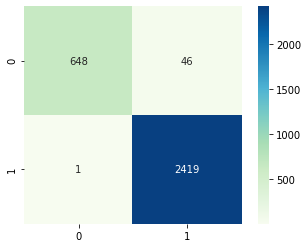

In [176]:
axes = sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar=True, cmap=plt.cm.GnBu)

# explore wrong predictions

In [274]:
counter = 0
wrong_predictions = 0
for state, county, prediction, label in zip( X_test.STATE, X_test.COUNTY, predictions, y_test):
    if prediction != label:
        wrong_predictions +=1
        print('state={}, county={},    prediction={},    expected={}'.format(state, county, prediction, label))
    counter += 1
   
print('total_rows={}'.format(counter))
print('total_wrong_predictions={}'.format(wrong_predictions))

state=5, county=147,    prediction=1,    expected=0
state=8, county=15,    prediction=1,    expected=0
state=8, county=111,    prediction=1,    expected=0
state=12, county=65,    prediction=1,    expected=0
state=13, county=7,    prediction=1,    expected=0
state=13, county=239,    prediction=1,    expected=0
state=17, county=15,    prediction=1,    expected=0
state=17, county=85,    prediction=1,    expected=0
state=17, county=155,    prediction=1,    expected=0
state=19, county=39,    prediction=1,    expected=0
state=19, county=115,    prediction=1,    expected=0
state=19, county=131,    prediction=1,    expected=0
state=21, county=63,    prediction=1,    expected=0
state=24, county=3,    prediction=0,    expected=1
state=26, county=159,    prediction=1,    expected=0
state=27, county=23,    prediction=1,    expected=0
state=27, county=69,    prediction=1,    expected=0
state=27, county=73,    prediction=1,    expected=0
state=27, county=155,    prediction=1,    expected=0
state=28,